In [1]:
import numpy as np
import pandas as pd
from scipy.signal import sawtooth
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy import signal as sg

## Punto1

### a

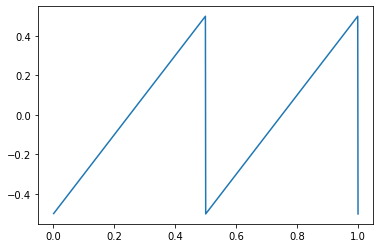

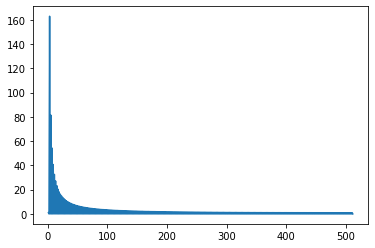

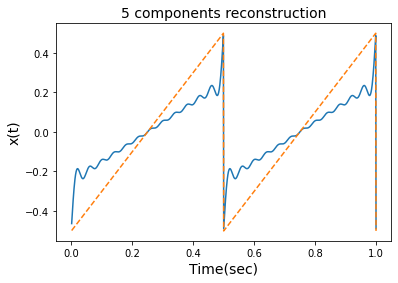

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import math 

fs = 1024          
Tt = 1            
N = Tt*fs          
f1 = 1/Tt     
t = np.arange(1,N+1)/fs 


sig = sawtooth(2 * np.pi *2* t)/2
plt.plot(t,sig)
plt.show()

N2 = np.round(N/2)
frec = (fs/2)*(np.arange(1,N2+1)/N2)
X = fft(sig)
plt.plot(frec,np.abs(X)[0:int(N2)])

# Reconstruction (ifft)
aux_index = np.arange(1,25)
X[aux_index] = 0 + 0j
sig_r = np.fft.ifft(X)
sig_r = np.real(sig_r)

plt.figure()
plt.plot(t,sig_r)
plt.plot(t,sig, linestyle='dashed')
plt.xlabel('Time(sec)',fontsize=14)
plt.ylabel('x(t)',fontsize=14)
plt.title('5 components reconstruction',fontsize=14)
plt.show()

### b

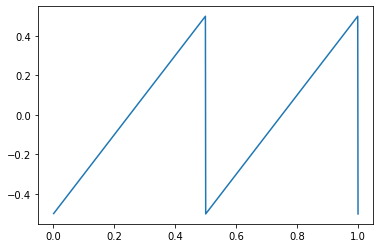

-0.001953125


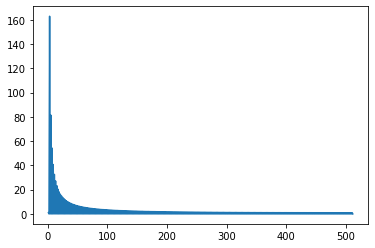

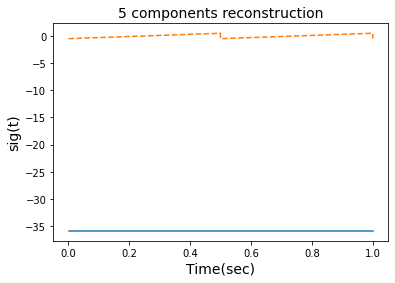

In [14]:
sig = sawtooth(2 * np.pi *2* t)/2
plt.plot(t,sig)
plt.show()

N2 = np.round(N/2)
frec = (fs/2)*(np.arange(1,N2+1)/N2)
X = fft(sig)
plt.plot(frec,np.abs(X)[0:int(N2)])

# aux_index = np.arange(1,25)
# X[aux_index] = 0 + 0j

# Fourier decomposition
a0 = 2*np.mean(sig)
print(a0)
f = np.zeros(round(N/2))
# Reconstruction
sig_r = np.zeros(N)        
for m in range(1,25):
    sig_r = sig_r + np.abs(X[m])*np.cos(2*np.pi*f[m]*t + np.angle(X[m]))
sig_r = sig_r + a0/2 

plt.figure()
plt.plot(t,sig_r)
plt.plot(t,sig, linestyle='dashed')
plt.xlabel('Time(sec)',fontsize=14)
plt.ylabel('sig(t)',fontsize=14)
plt.title('5 components reconstruction',fontsize=14)
plt.show()

## Punto2

In [81]:
df = pd.read_csv("datos/signal1.csv")

In [82]:
fs = 1000
N = df.shape[0]
df["time"] = np.arange(1/fs ,df.shape[0], 1)/fs
df.head()

,Signal,time
0,0.718,0.000001
1,-0.494,0.001001
2,-0.698,0.002001
3,-0.621,0.003001
4,1.583,0.004001


In [85]:
def plot_fft(df, n):
    df = df.head(n)
    X = df["time"].values
    y = df["Signal"].values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(X,y)
    N = df.shape[0]
    T = 1/fs
    N2 = np.round(N/2)
    xf = (fs/2)*(np.arange(1,N2+1)/N2)
    yf = np.abs(fft(y))[0:int(N2)]
    ax2.plot(xf, yf)
    plt.show()

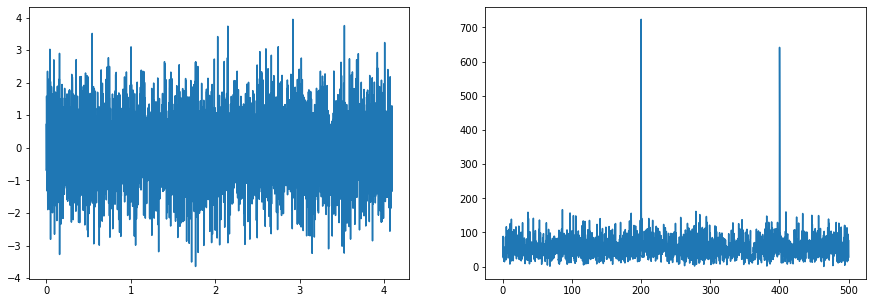

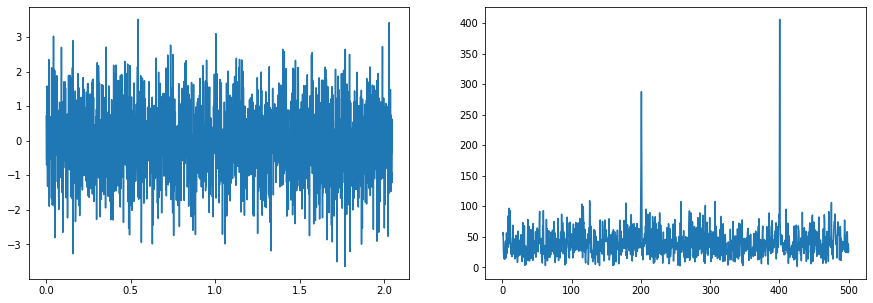

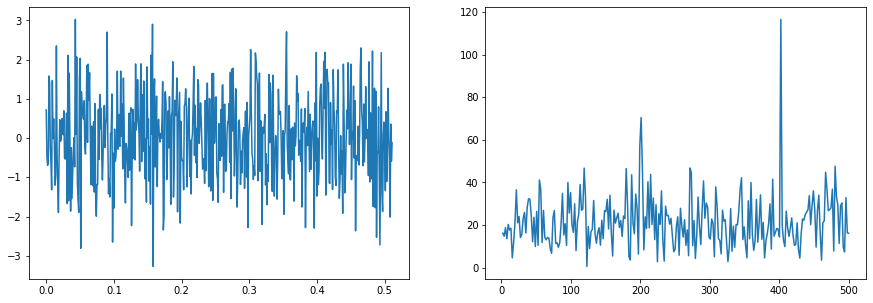

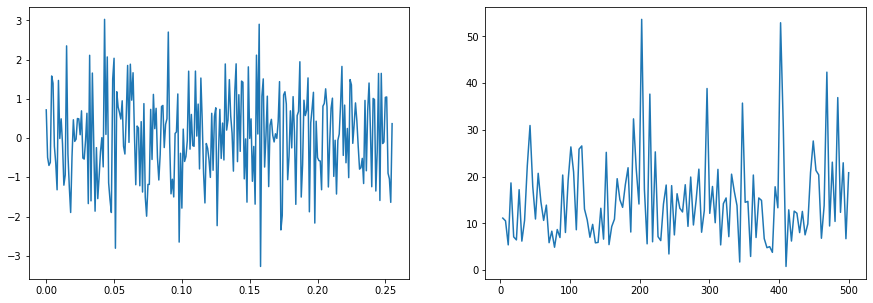

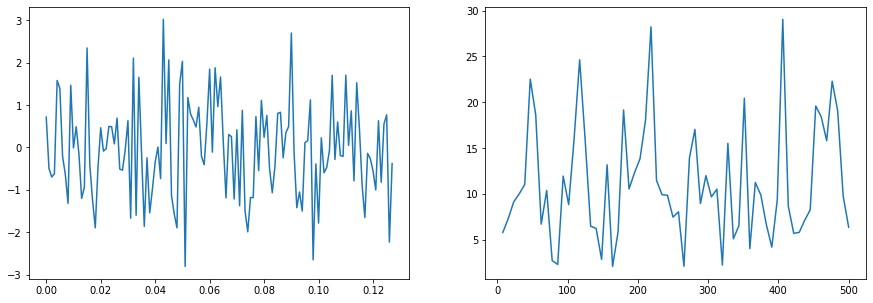

In [86]:
for n in (4096, 2048, 512, 256,128):
    plot_fft(df, n)

In [87]:
def plot_fft_zero_padding(df, n):
    X = df["time"].values
    y = df["Signal"].values
    y[n:] = 0
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(X,y)
    N = df.shape[0]
    T = 1/fs
    N2 = np.round(N/2)
    xf = (fs/2)*(np.arange(1,N2+1)/N2)
    yf = np.abs(fft(y))[0:int(N2)]
    ax2.plot(xf, yf)
    plt.show()

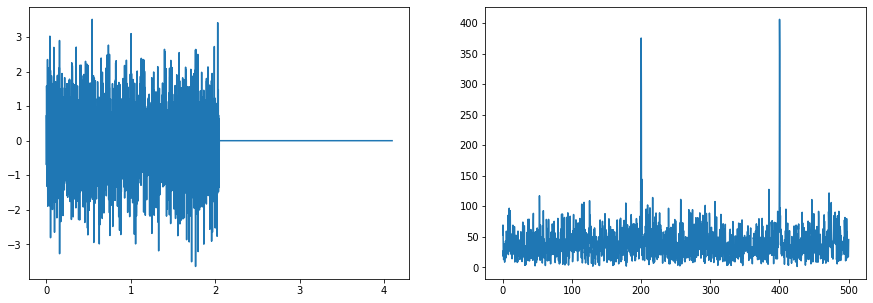

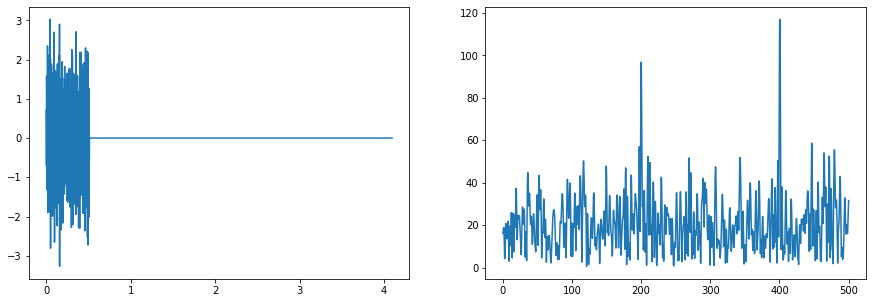

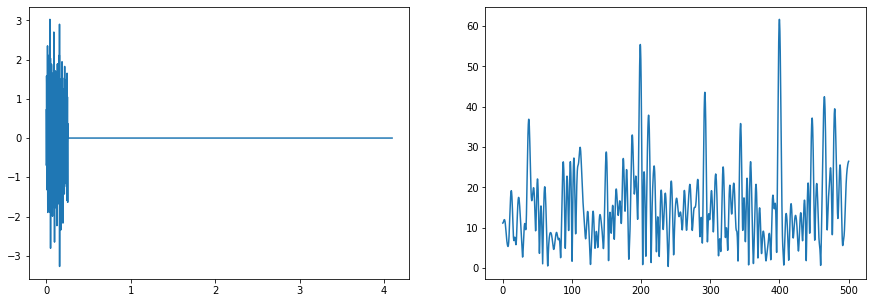

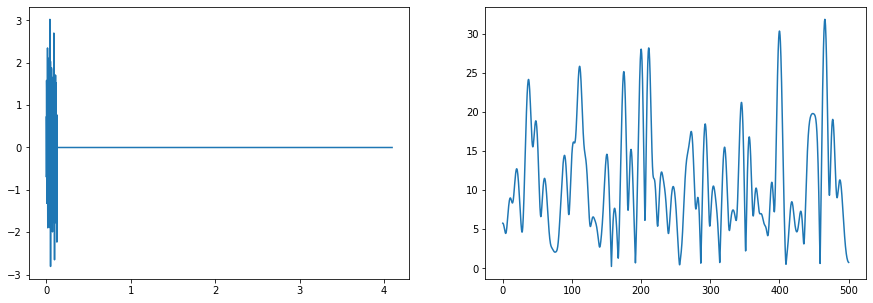

In [88]:
for n in (2048, 512, 256,128):
    plot_fft_zero_padding(df, n)

## Punto 3

In [174]:
df_ecg = pd.read_csv("datos/ecg_1min.csv")
fs = 250
df_ecg["time"] = np.arange(1/fs ,df_ecg.shape[0], 1)/fs
df_ecg.head()

,ECG,time
0,-83.0,0.000016
1,-78.0,0.004016
2,-86.0,0.008016
3,-72.0,0.012016
4,-81.0,0.016016


In [175]:
X = df_ecg["time"].values
y = df_ecg["ECG"].values

N = df_ecg.shape[0]
T = 1/fs

N2 = np.round(N/2)
xf = (fs/2)*(np.arange(1,N2+1)/N2)
yf = np.abs(fft(y))[0:int(N2)]

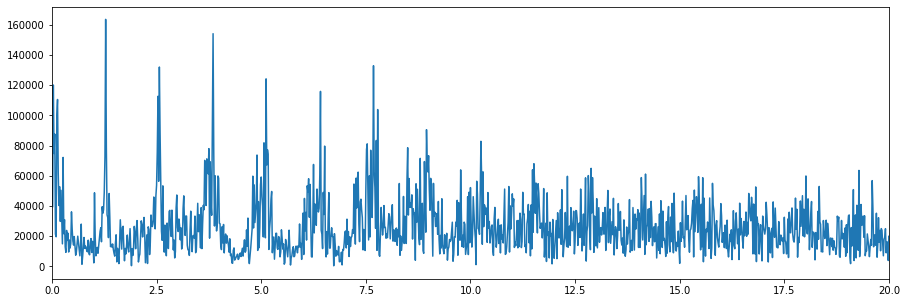

In [176]:
plt.figure(figsize=(15,5))
plt.plot(xf, yf)
plt.xlim([0,20])
plt.show()

In [178]:
hr = xf[np.where(yf == np.max(yf[xf<3]))][0] *60
print(f"heart rate is: {np.round(hr,2)} beats per minute")

heart rate is: 77.0 beats per minute


### b

In [179]:
peaks = pd.read_csv("datos/ecg_1min_rpeaks.csv").values
peaks = [a[0] for a in peaks]

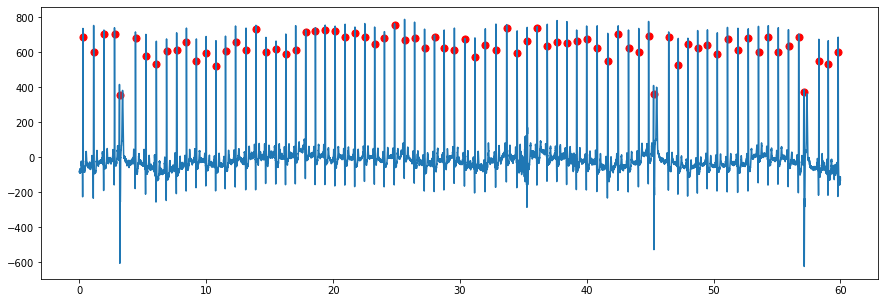

In [180]:
plt.figure(figsize=(15,5))
plt.plot(df_ecg.time, df_ecg.ECG)
plt.scatter(df_ecg.loc[peaks,"time"],df_ecg.loc[peaks,"ECG"],s=50,color="red", zorder=2)

plt.show()

In [181]:
times = df_ecg.loc[peaks,"time"].diff().values[1:]
frecs = 1/times
mean_frec = np.mean(frecs)
hr = mean_frec*60
print(f"heart rate is: {np.round(hr,2)} beats per minute")

heart rate is: 77.69 beats per minute


## Punto 4

In [192]:
fs = 1000
noise_df = pd.read_csv("datos/ecg_noise.csv")
noise_df["time"] = np.arange(1/fs ,noise_df.shape[0], 1)/fs
noise_df.head()

,ECG,time
0,0.363,0.000001
1,0.246,0.001001
2,0.297,0.002001
3,0.386,0.003001
4,0.365,0.004001


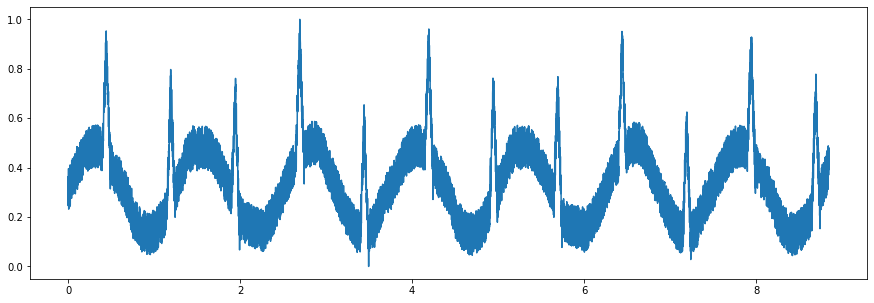

In [193]:
plt.figure(figsize=(15,5))
plt.plot(noise_df["time"], noise_df["ECG"])
plt.show()

In [194]:
X = noise_df["time"].values
y = noise_df["ECG"].values

N = noise_df.shape[0]
T = 1/fs

N2 = np.round(N/2)
xf = (fs/2)*(np.arange(1,N2+1)/N2)
yf = np.abs(fft(y))[0:int(N2)]

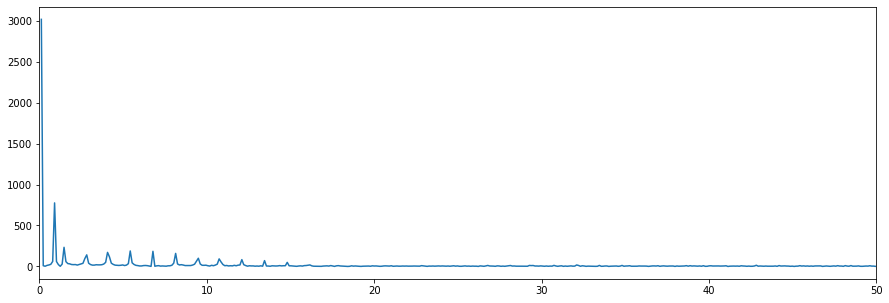

In [195]:
plt.figure(figsize=(15,5))
plt.plot(xf, yf)
plt.xlim([0,50])
plt.show()

### pasa altas

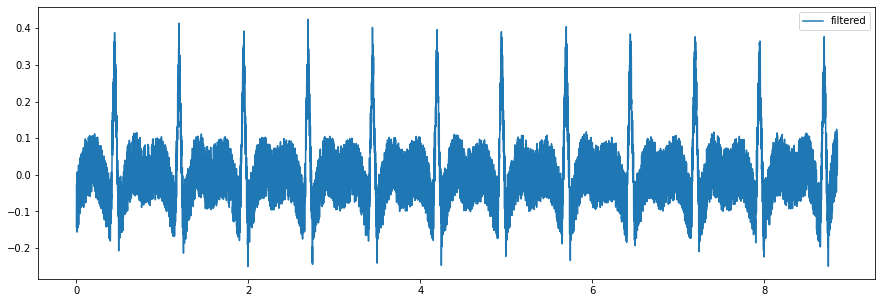

In [215]:
plt.figure(figsize=(15,5))
fc = 3  # Frecuencia de corte
w = fc / (fs / 2) # Frecuencia normalizada
orden = 5 # orden del filtro
b, a = sg.butter(orden, w, 'high') 
y_pa = sg.filtfilt(b, a, y)
plt.plot(X, y_pa, label='filtered')
plt.legend()
plt.show()

### pasabajas

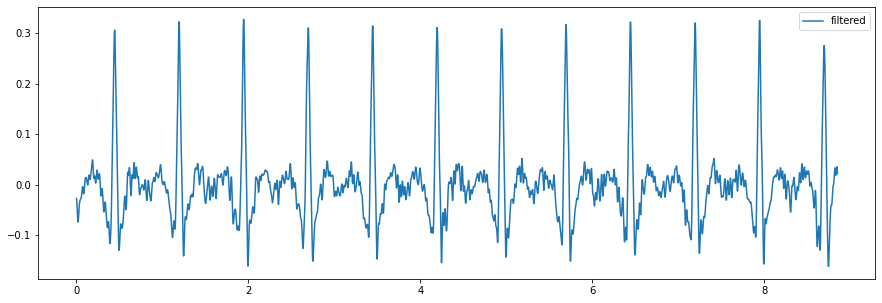

In [219]:
plt.figure(figsize=(15,5))
fc = 40  # Frecuencia de corte
w = fc / (fs / 2) # Frecuencia normalizada
orden = 5 # orden del filtro
b, a = sg.butter(orden, w, 'low') 
y_pb = sg.filtfilt(b, a, y_pa)
plt.plot(X, y_pb, label='filtered')
plt.legend()
plt.show()